# Data exploration

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

path = '/kaggle/input/playground-series-s5e8/train.csv'
bank_data = pd.read_csv(path, index_col='id')

Showing the first entries

In [25]:
print(bank_data.columns)
bank_data.head()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


Descriptions of each of the variables are:
* **Numeric varaibles**
    * age: Age of the client (numeric)
    * balance: Average yearly balance in euros (numeric)
    * day: Last contact day of the month (numeric, 1-31)
    * duration: Last contact duration in seconds (numeric)
    * campaign: Number of contacts performed during this campaign (numeric)
    * pdays: Number of days since the client was last contacted from a previous campaign (numeric; -1 means the client was not previously contacted)
    * previous: Number of contacts performed before this campaign (numeric)
* **Categorical variables**
    * job: Type of job (categorical: "admin.", "blue-collar", "entrepreneur", etc.)
    * marital: Marital status (categorical: "married", "single", "divorced")
    * education: Level of education (categorical: "primary", "secondary", "tertiary", "unknown")
    * default: Has credit in default? (categorical: "yes", "no")
    * housing: Has a housing loan? (categorical: "yes", "no")
    * loan: Has a personal loan? (categorical: "yes", "no")
    * contact: Type of communication contact (categorical: "unknown", "telephone", "cellular")
    * month: Last contact month of the year (categorical: "jan", "feb", "mar", …, "dec")
    * poutcome: Outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")
    * y: The target variable, whether the client subscribed to a term deposit (binary: "yes", "no")

y is the target variable, which is about wheter the client has subscribed to a deposit. This would be expected to be financially secure people, as well as people with a stable situation in their life, such as being married and having a high education level. It would also be expected that people that have been having the deposit promoted would be more likely to subscribe to the deposit. 

In [26]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [27]:
bank_data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,750000,750000,750000,750000,750000,750000,750000,750000,750000
unique,12,3,4,2,2,2,3,12,4
top,management,married,secondary,no,yes,no,cellular,may,unknown
freq,175541,480759,401683,737151,411288,645023,486655,228411,672450


***Key takeaways from the description:***
* The mean of y is 0.12, meaning that only 12% of all customers were contacted. this makes it a skewed regression problem. The baseline for accuracy is therefore 87.9349%
* All customers were contacted in this campaign at least once
* Not a lot of customers have been contacted prviously, as the average is 0.29. 

In [28]:
len(bank_data)

750000

There is a total of 750.000 entries, a lot of data to work with. The categorical data can be visualized to get an overview of everything

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'y'}>, <Axes: >]], dtype=object)

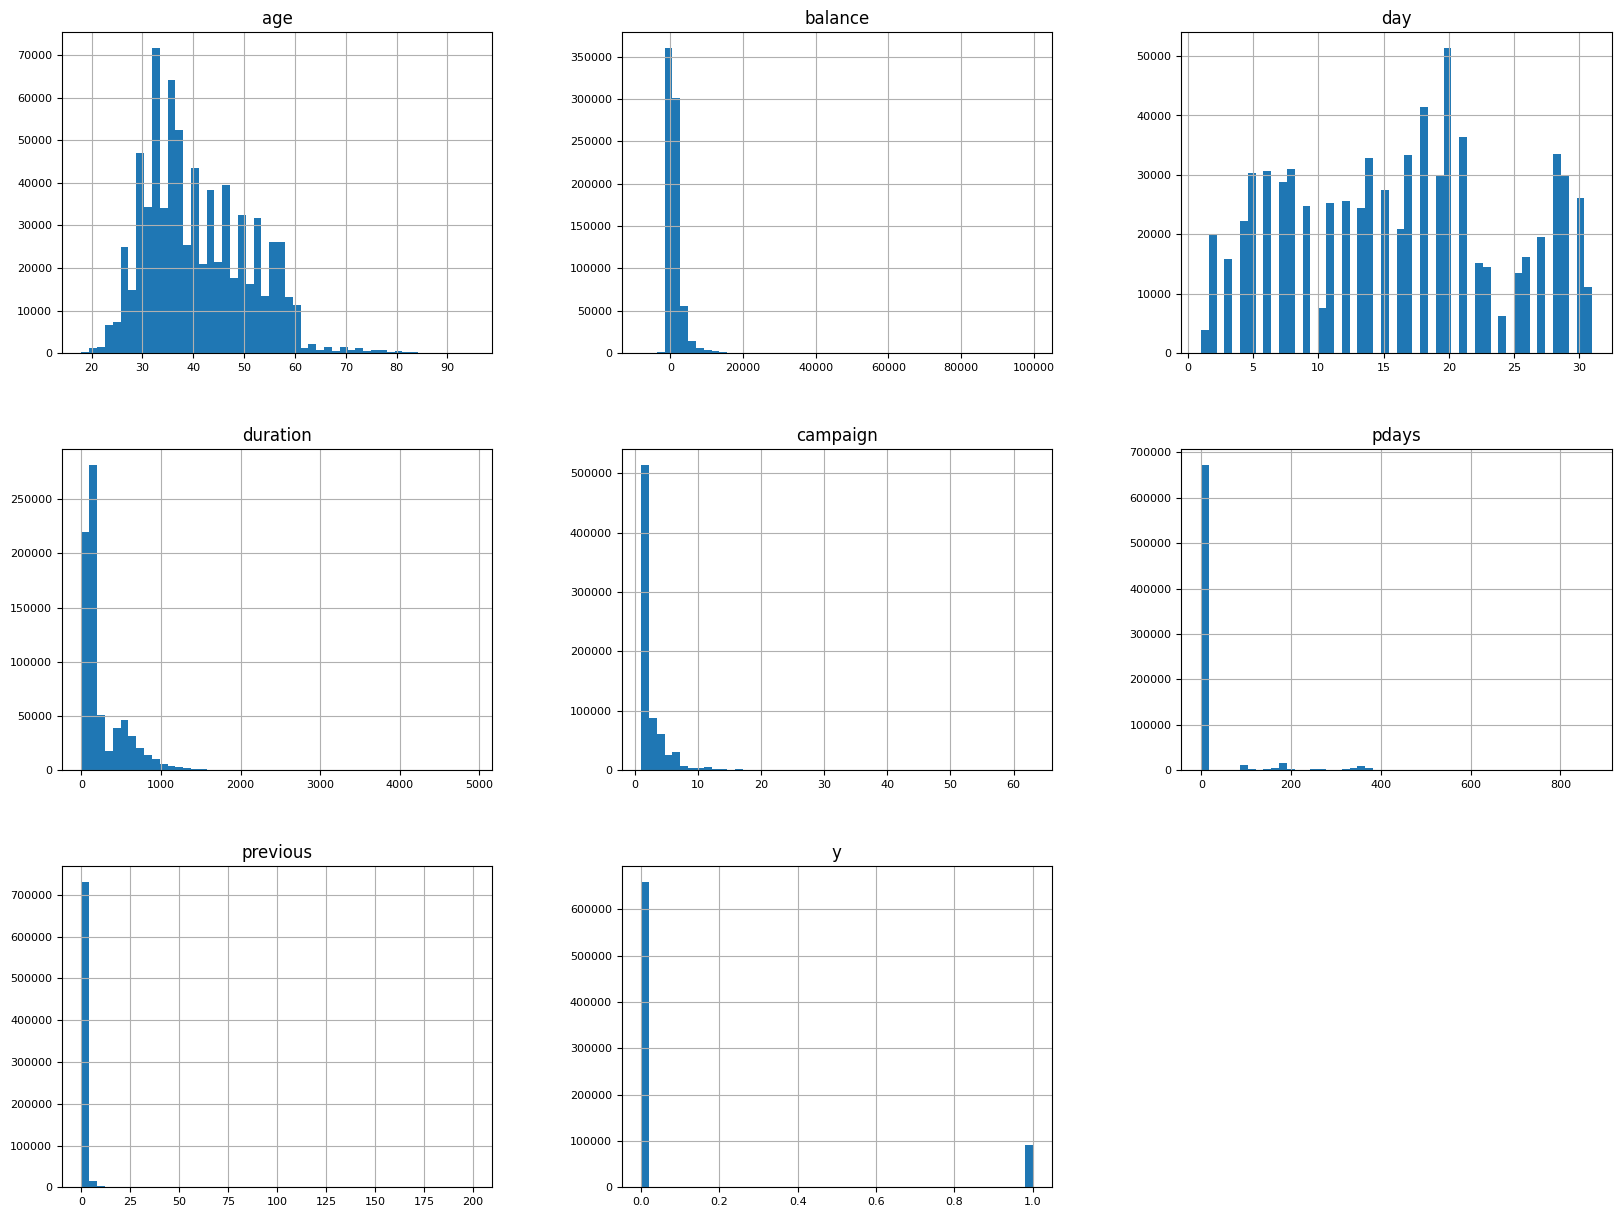

In [29]:
bank_data.hist(figsize=(20, 15), bins=50, xlabelsize=8, ylabelsize=8)

The day variable seems to be questionable to use, as it just describes the day of the contact, which might not have any impact on the sale. 

<BarContainer object of 12 artists>

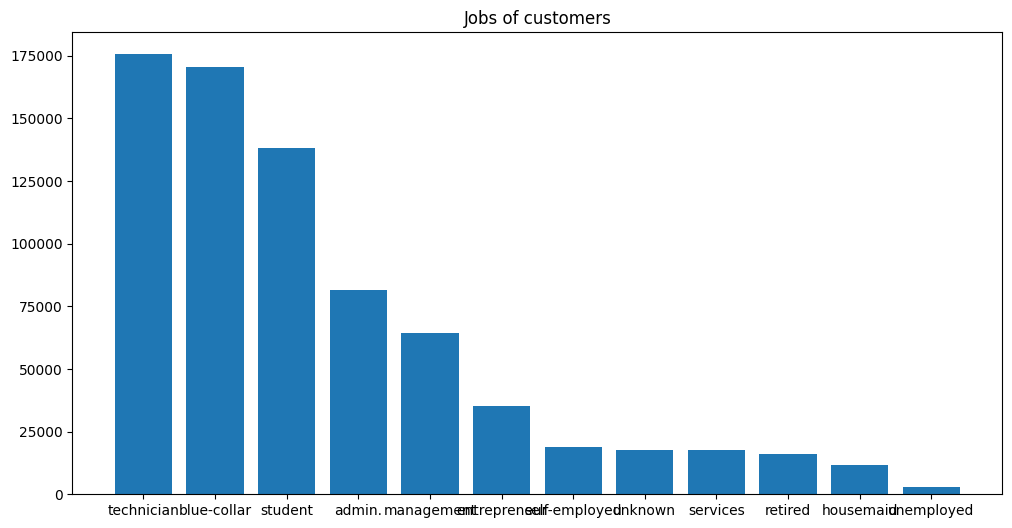

In [30]:
import matplotlib.pyplot as plt
# plt.bar(bank_data['job'].unique(), )
plt.figure(figsize=(12, 6))
plt.title("Jobs of customers")
plt.bar(bank_data['job'].unique(), bank_data['job'].value_counts())

<Axes: xlabel='marital', ylabel='count'>

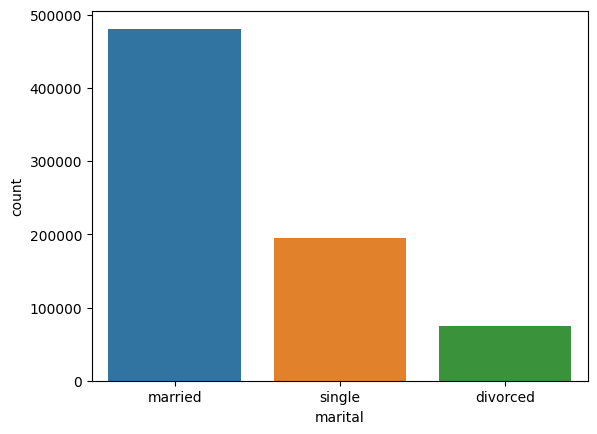

In [31]:
import seaborn as sns
sns.countplot(bank_data, x = 'job')
sns.countplot(bank_data, x = 'marital')

* **Categorical variables**
    * job: Type of job (categorical: "admin.", "blue-collar", "entrepreneur", etc.)
    * marital: Marital status (categorical: "married", "single", "divorced")
    * education: Level of education (categorical: "primary", "secondary", "tertiary", "unknown")
    * default: Has credit in default? (categorical: "yes", "no")
    * housing: Has a housing loan? (categorical: "yes", "no")
    * loan: Has a personal loan? (categorical: "yes", "no")
    * contact: Type of communication contact (categorical: "unknown", "telephone", "cellular")
    * month: Last contact month of the year (categorical: "jan", "feb", "mar", …, "dec")
    * poutcome: Outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")
    * y: The target variable, whether the client subscribed to a term deposit (binary: "yes", "no")

/tmp/ipykernel_36/4218825829.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 3, plot_count + 1)  # Adjust subplot position


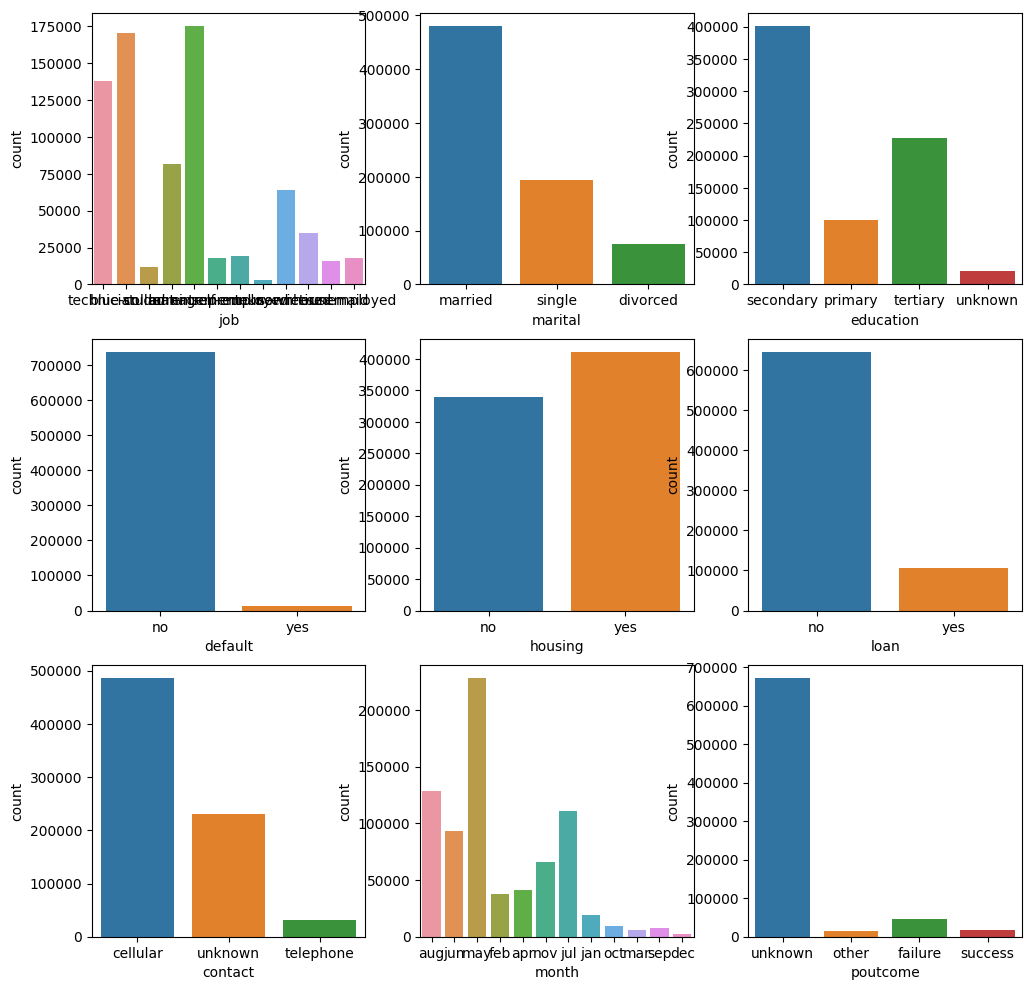

In [32]:
plt.figure(figsize=(12, 12))
plt.title("Categoraical variables")
plt.axis("off")
plot_count = 0  # Initialize a counter for displayed images
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for var in categorical_variables:
    ax = plt.subplot(3, 3, plot_count + 1)  # Adjust subplot position
    sns.countplot(bank_data, x = var)
    plot_count += 1  # Increment the counter
plt.show()

### Missing variables

Very nice. Let us check for missing variables

In [33]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing data, however there are some variabels that are labled 'unkown', as well as pdays has some variables that have -1 as entries, which should be considered invalid entries.

# Data preparation

The data is formatted appropriately. Here are the things that should be done in the dataset:
* pdays variables should be made categorical into number of days since last call.
* The relevance of some variables should be considered, and potenially removed.
* Numerical variables should be centered and scaled.
* Remove all entries with missing data:
    * Unkwon education levels
    * Unkown jobs
* Categorical variables should be dummy encoded. 

In [34]:
import random
# Data preparation
def dataPrep(columns_to_keep=['age', 'y'], rows_to_keep=1):
    bank_data_clean = bank_data.copy()
    if ((rows_to_keep > 1) or (rows_to_keep) <= 0):
        rows_to_keep = 1
    max_row = int(len(bank_data_clean) * rows_to_keep)
    rows = random.sample(range(len(bank_data_clean)), max_row)
    bank_data_clean = bank_data_clean.loc[rows, columns_to_keep]
    # Dummy encoding
    bank_data_clean = pd.get_dummies(bank_data_clean, drop_first=True)
    # Making X and y variables
    X = bank_data_clean.drop(columns=['y'])
    y = bank_data_clean['y']
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, test_size=0.3)
    return([train_X, val_X, train_y, val_y])

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error

def printResults(model, train_X, val_X, train_y, val_y):
    # Training accuracy:
    predictions_train = rf_model.predict(train_X)
    print('training accuracy:', (predictions_train == train_y.values).mean())
    # Testing accuracy:
    predictions_test = rf_model.predict(val_X)
    print('testing accuracy:', (predictions_test == val_y.values).mean())
    # Finding the ROC
    print('train roc:', roc_auc_score(train_y, rf_model.predict_proba(train_X)[:, 1]))
    print('test ROC:', roc_auc_score(val_y, rf_model.predict_proba(val_X)[:, 1]))

In [36]:
bank_data_clean = bank_data.copy()

In [37]:
# Chosing columsn to keep
# days and pdays seems to have issues so these are excluded
columns_to_keep = ['age', 'balance', 'duration', 'campaign', 'previous', 'y'] 
bank_data_clean = bank_data_clean[columns_to_keep]

In [38]:
# Dummy encoding
bank_data_clean = pd.get_dummies(bank_data_clean, drop_first=True)
bank_data_clean.shape

(750000, 6)

In [39]:
bank_data_clean

,age,balance,duration,campaign,previous,y
id,,,,,,
0,42,7,117,3,0,0
1,38,514,185,1,0,0
2,36,602,111,2,0,0
3,27,34,10,2,0,0
4,26,889,902,1,0,1
...,...,...,...,...,...,...
749995,29,1282,1006,2,0,1
749996,69,631,87,1,0,0
749997,50,217,113,1,0,0


In [40]:
from sklearn.model_selection import train_test_split
# Making X and y variables
X = bank_data_clean.drop(columns=['y'])
y = bank_data_clean['y']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Modelling

Different models will be created and compared.

## Logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0)
lr_model.fit(train_X, train_y)

LogisticRegression(random_state=0)

Accuracy

In [42]:
from sklearn.metrics import mean_absolute_error

#mean_absolute_error(predictions, val_y)
# Training accuracy:
predictions_train = lr_model.predict(train_X)
print('training accuracy:', (predictions_train == train_y.values).mean())
# Testing accuracy:
predictions_test = lr_model.predict(val_X)
print('testing accuracy:', (predictions_test == val_y.values).mean())


training accuracy: 0.8947786666666667
testing accuracy: 0.895056


The testing accuracy is a whopping 89.51%!!!! This is amazing, and it is more than 1.5% percent points better than the baseline of 87.9349%.

In [43]:
from sklearn.metrics import roc_auc_score
# Finding the ROC
print('train roc:', roc_auc_score(train_y, lr_model.predict_proba(train_X)[:, 1]))
print('test ROC:', roc_auc_score(val_y, lr_model.predict_proba(val_X)[:, 1]))

train roc: 0.8964348368891387
test ROC: 0.8963389972640907


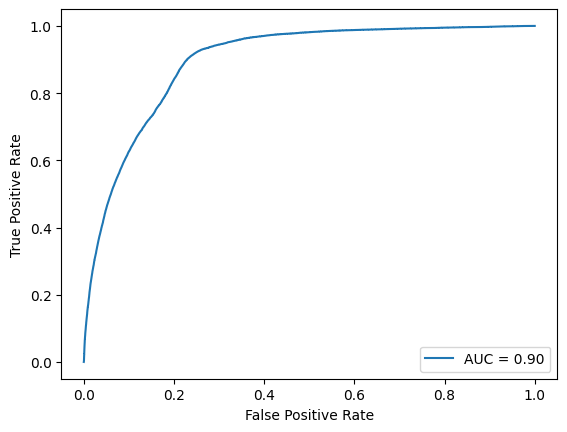

In [44]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(val_y, lr_model.predict_proba(val_X)[:, 1])
roc_auc = metrics.auc(fpr, tpr)
#fig, ax = plt.subplots()
#ax.axline((0, 0.5), slope=0.5, color="black", linestyle=(0, (5, 5)))
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

display.plot()
plt.show()

## Random forrests
who doesn't like a walk in the forrest?

In [164]:
# Prepping the data
# All columns:
# ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
columns_to_keep = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
train_X, val_X, train_y, val_y = dataPrep(columns_to_keep)

In [165]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model = rf_model.fit(train_X, train_y)

In [166]:
printResults(rf_model, train_X, val_X, train_y, val_y)

training accuracy: 0.9999809523809524
testing accuracy: 0.9320666666666667
train roc: 0.9999999995903948
test ROC: 0.961129183634288


There seems to be a very high training accuracy, which indicates overfitting. Hyperparamter tuning should be needed.

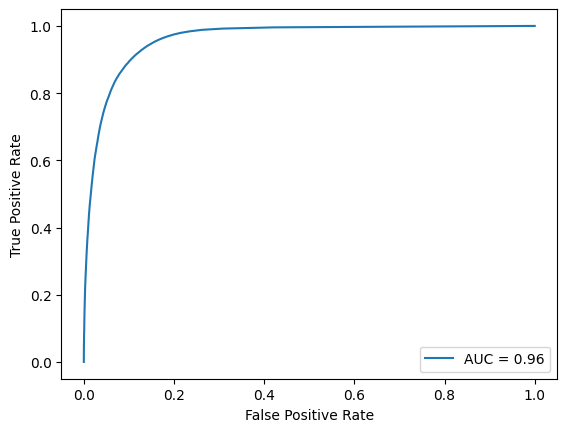

In [167]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(val_y, rf_model.predict_proba(val_X)[:, 1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

display.plot()
plt.show()

In [168]:
roc_auc

0.961129183634288

### Hyperparamter tuning

The tuning is done using only a sample of the rows.

In [49]:
# Prepping the data
# All columns:
# ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
columns_to_keep = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
train_X, val_X, train_y, val_y = dataPrep(columns_to_keep, 0.01)

The below code is setting up the grid tuning. The variables that are tuned are max features, min samples split and minimum samples leaf. 5-fold CV is used. 

In [146]:
from sklearn.model_selection import RepeatedKFold, GridSearchCV

model = RandomForestClassifier()

max_features = [0.16, 0.2, 0.25, 0.3]
min_samples_split = [2, 3, 4, 5, 6]
min_samples_leaf = [1, 2, 3]
grid = dict(max_features=max_features, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

gridSearch = GridSearchCV(
    estimator=model,
    param_grid=grid,
    verbose=1,
    n_jobs=-1,
	cv=5,
    scoring='roc_auc'
)

In [147]:
searchResults = gridSearch.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


The below code will show the best model specifications:

In [148]:
bestModel = searchResults.best_estimator_
bestModel

RandomForestClassifier(max_features=0.2, min_samples_leaf=2,
                       min_samples_split=6)

<Axes: xlabel='max_features', ylabel='results'>

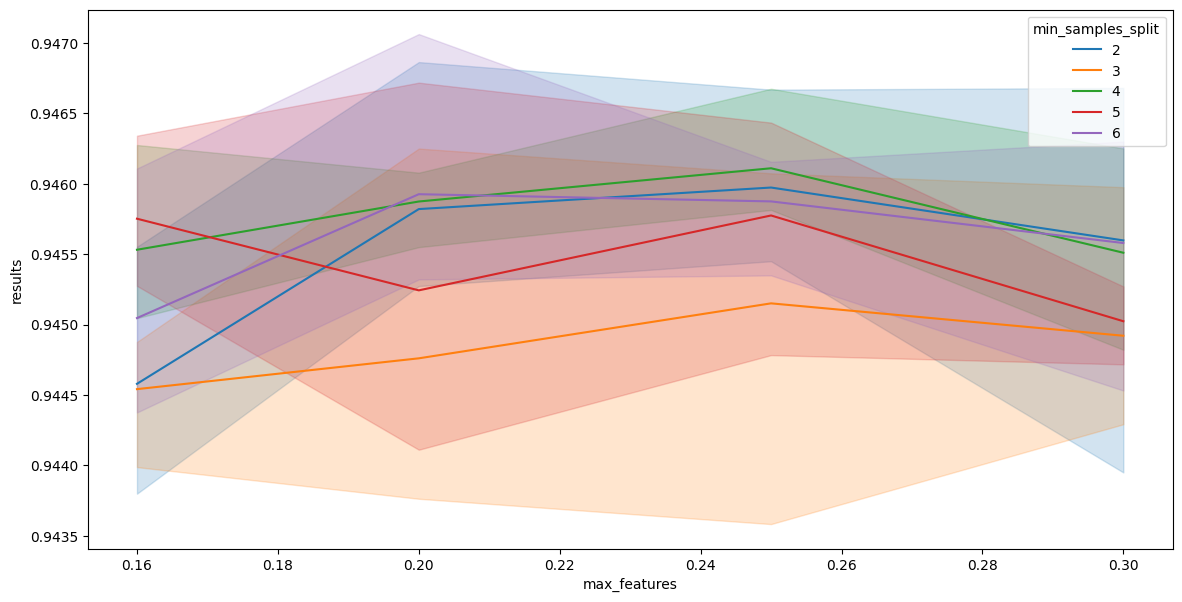

In [150]:
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
results_df = pd.DataFrame(searchResults.cv_results_['params'])
results_df['results'] = searchResults.cv_results_['mean_test_score']
results_df['min_samples_leaf'] = results_df['min_samples_leaf'].astype(str)
results_df['min_samples_split'] = results_df['min_samples_split'].astype(str)
leafs = []
for i in range(len(results_df)):
    leafs.append('min_samples_leaf: ' + str(results_df.loc[i, 'min_samples_leaf']) + ' min_samples_split: ' + str(results_df.loc[i, 'min_samples_split']))
results_df['leafs'] = leafs
plt.figure(figsize=(14, 7))
sns.lineplot(data=results_df, y='results', x='max_features', hue='min_samples_split')

As can be observed in the graph, all the resulst are very similar in terms of ROC. 

#### Applying the hyperparamter tuning

The below code will apply the attributes to the entire dataset.

In [153]:
columns_to_keep = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
train_X, val_X, train_y, val_y = dataPrep(columns_to_keep)
bestModel.fit(train_X, train_y)

RandomForestClassifier(max_features=0.2, min_samples_leaf=2,
                       min_samples_split=6)

In [154]:
printResults(bestModel, train_X, val_X, train_y, val_y)

training accuracy: 0.979887619047619
testing accuracy: 0.9797644444444444
train roc: 0.9933660811282732
test ROC: 0.9929508761603287


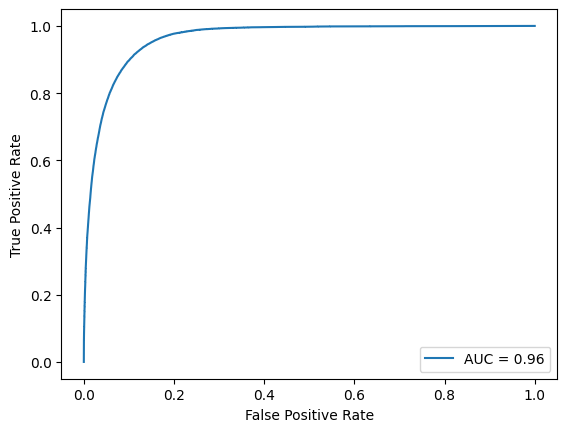

In [159]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(val_y, bestModel.predict_proba(val_X)[:, 1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

display.plot()
plt.show()

In [156]:
roc_auc

0.9627183060112032

# Submitting to competition

The Random forest model was the best performing model in terms of ROC. Therefore, this model will be trained on the enitre dataset. 

In [181]:
# Importing the test dataset
bank_test = pd.read_csv('/kaggle/input/playground-series-s5e8/test.csv', index_col='id')
bank_test = pd.get_dummies(bank_test, drop_first=True)

In [172]:
# Prepping the training data
bank_data_clean = bank_data.copy()
bank_data_clean = pd.get_dummies(bank_data_clean, drop_first=True)
X = bank_data_clean.drop(columns=['y'])
y = bank_data_clean['y']

In [173]:
# Running the model
bestModel.fit(X, y)

RandomForestClassifier(max_features=0.2, min_samples_leaf=2,
                       min_samples_split=6)

In [182]:
predictions = bestModel.predict_proba(bank_test)[:, 1]
predictions

array([0.00221468, 0.23649869, 0.00111111, ..., 0.71312987, 0.00086071,
       0.03265527])

In [186]:
output = pd.DataFrame({'id': bank_test.index,
                       'y': predictions})
output.to_csv('submission.csv', index=False)